In [26]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [163]:
A0 = 3
A1 = 2

fs = 200  # hz
T = 2  # s
N = int(T * fs)

M = 50
Tb = T / M # s
fn = N * (1 / Tb)
Tbp = int(N / M)

In [164]:
raw_data = np.random.randint(2, size=M)
raw_data

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0])

In [167]:
data = np.array([item for item in raw_data for _ in range(Tbp)])
data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

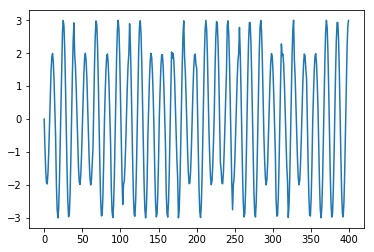

In [171]:
ask = (data * A1 + (data - 1) * -A0) * np.sin(2 * 3.14 * fn * np.arange(len(data)))
plt.plot(ask)

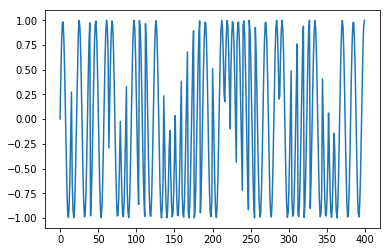

In [174]:
psk = np.sin(2 * 3.14 * fn * np.arange(len(data)) + data * 3.14)
plt.plot(psk)

In [248]:
def prepare_plot(X):
    size = len(X) // 2 - 1
    
    M = [0] * size
    for k in range(size):
        M[k] = np.sqrt(X[k].real ** 2 + X[k].imag ** 2)

    M_ = [10 * np.log10(m) for m in M]
    fk = [k * fs / len(X) for k in range(size)]
    
    return fk, M_

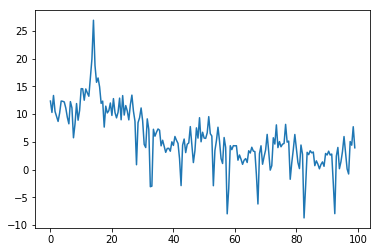

In [249]:
plt.plot(*prepare_plot(np.fft.fft(ask)))

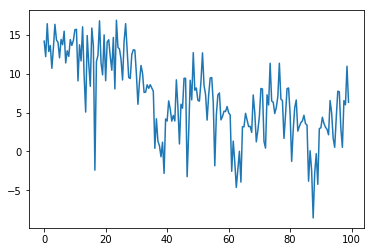

In [250]:
plt.plot(*prepare_plot(np.fft.fft(psk)))

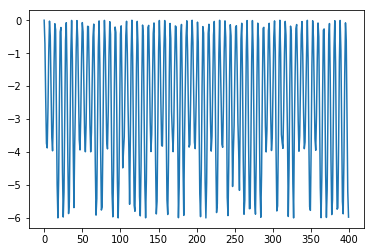

In [225]:
xA = ask * -np.sin(2 * 3.14 * fn * np.arange(len(data))) * A1
plt.plot(xA)

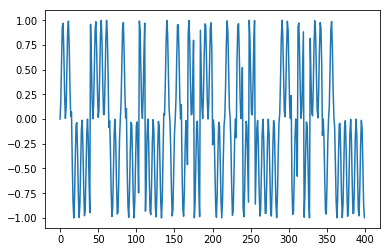

In [224]:
xP = psk * -np.sin(2 * 3.14 * fn * np.arange(len(data)))
plt.plot(xP)

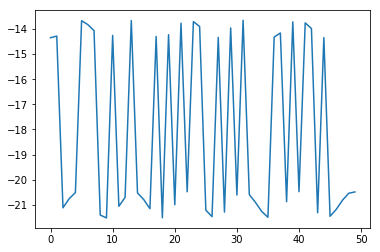

In [226]:
pA = np.array([np.trapz(part) for part in xA.reshape(int(len(xA) / Tbp), Tbp)])
plt.plot(pA)

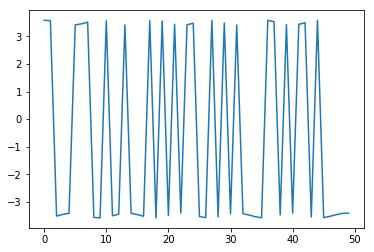

In [227]:
pP = np.array([np.trapz(part) for part in xP.reshape(int(len(xP) / Tbp), Tbp)])
plt.plot(pP)

In [228]:
threshold_A = np.mean(pA)
threshold_A

-18.05607421293666

In [229]:
threshold_P = np.mean(pP)
threshold_P

-0.5574504860964149

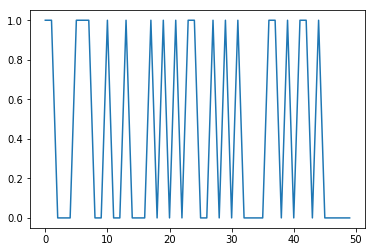

In [235]:
resultA = pA.copy()
resultA[pA > threshold_A] = 1
resultA[pA < threshold_A] = 0
resultA = resultA.astype(int)
plt.plot(resultA)

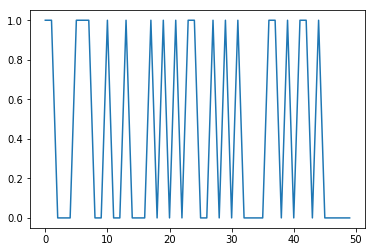

In [236]:
resultP = pP.copy()
resultP[pP > threshold_P] = 1
resultP[pP < threshold_P] = 0
resultP = resultP.astype(int)
plt.plot(resultP)

In [237]:
resultA

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0])

In [238]:
raw_data

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0])

In [239]:
resultP

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0])

In [245]:
assert np.all(resultA == raw_data) and np.all(resultP == raw_data)